In [1]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Conv2D, MaxPooling2D
from keras.layers.core.flatten import Flatten
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
import numpy as np

169017344/169001437 [==============================] - 11s 0us/step


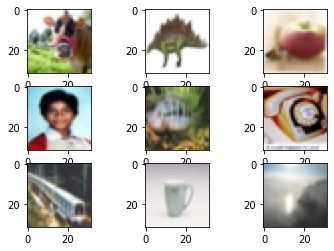

In [2]:
(x_train, y_train),(x_test,y_test) = cifar100.load_data()
for i in range(9):
  plt.subplot(330 + i +1)
  plt.imshow(x_train[i])
plt.show()

In [3]:
x = x_test
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test/= 255

In [4]:
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [9]:
model = Sequential()
# BLOCK 1
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same' ,input_shape =(32,32,3)))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# Add ANN
model.add(Flatten())
model.add(Dense(512,activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(512,activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(100,activation = 'softmax'))
opt = SGD(lr= 0.01, momentum = 0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [11]:

history = model.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_data = (x_test,y_test), verbose = 1)
   

Epoch 1/50
391/391 [==============================] - 20s 48ms/step - loss: 3.9575 - accuracy: 0.1006 - val_loss: 3.4529 - val_accuracy: 0.1845
Epoch 2/50
391/391 [==============================] - 18s 47ms/step - loss: 3.1132 - accuracy: 0.2431 - val_loss: 2.8976 - val_accuracy: 0.2884
Epoch 3/50
391/391 [==============================] - 18s 47ms/step - loss: 2.5936 - accuracy: 0.3443 - val_loss: 2.5879 - val_accuracy: 0.3494
Epoch 4/50
391/391 [==============================] - 18s 47ms/step - loss: 2.1916 - accuracy: 0.4269 - val_loss: 2.3788 - val_accuracy: 0.3967
Epoch 5/50
391/391 [==============================] - 18s 47ms/step - loss: 1.8141 - accuracy: 0.5136 - val_loss: 2.4437 - val_accuracy: 0.4022
Epoch 6/50
391/391 [==============================] - 18s 47ms/step - loss: 1.4331 - accuracy: 0.6033 - val_loss: 2.4534 - val_accuracy: 0.4073
Epoch 7/50
391/391 [==============================] - 20s 51ms/step - loss: 1.0220 - accuracy: 0.7043 - val_loss: 2.6544 - val_accuracy:

In [12]:
model.save('CNN_Cifar100.h5')

from keras.models import load_model
model5 = load_model('CNN_Cifar100.h5')

In [13]:
score = model.evaluate(x_test,y_test,verbose = 1)

313/313 [==============================] - 3s 9ms/step - loss: 5.9627 - accuracy: 0.4226


cloud


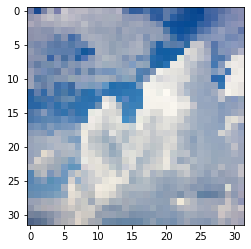

In [28]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img = load_img('cloud.jpg',target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32,32,3)
import numpy as np
cifar_100_Label = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
print(cifar_100_Label[np.argmax(model.predict(img),axis = 1)[0]])

wardrobe


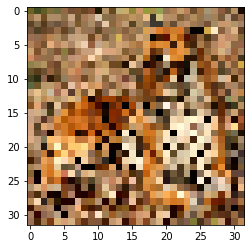

In [27]:
img = load_img('Tiger.JPG',target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32,32,3)
print(cifar_100_Label[np.argmax(model.predict(img),axis = 1)[0]])

lamp


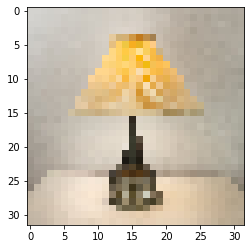

In [26]:
img = load_img('lamp.jpg',target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32,32,3)
print(cifar_100_Label[np.argmax(model.predict(img),axis = 1)[0]])

poppy


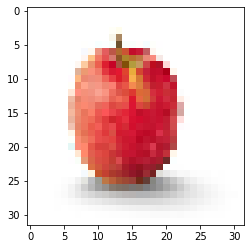

In [25]:
img = load_img('apple.jpg',target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32,32,3)
print(cifar_100_Label[np.argmax(model.predict(img),axis = 1)[0]])